Importing  relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

Downloading the required corpus

In [2]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


        C:\Users\vikhyathrai\AppData\Roaming\nltk_data...
      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


For Spam filtering we will use  dataset from the [UCI datasets](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection)!

Chacking out the data using List

In [7]:
messages=[line.rstrip()  for line in open('C:\\Users\\vikhyathrai\\Documents\\Python Scripts\\Refactored_Py_DS_ML_Bootcamp-master\\20-Natural-Language-Processing\\smsspamcollection\\SMSSpamCollection')]

In [8]:
type(messages)
    

list

In [9]:
len(messages)

5574

In [10]:
for message_number,message_text in enumerate(messages[:10]):
    print(message_number,message_text)

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1 ham	Ok lar... Joking wif u oni...
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3 ham	U dun say so early hor... U c already then say...
4 ham	Nah I don't think he goes to usf, he lives around here though
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 1

we can see it is a tab separated file

Importing to Pandas

In [23]:
pmessage=pd.read_csv('C:\\Users\\vikhyathrai\\Documents\\Python Scripts\\Refactored_Py_DS_ML_Bootcamp-master\\20-Natural-Language-Processing\\smsspamcollection\\SMSSpamCollection',sep='\t',names=["label","text"])

Exploratory Data Analysis

In [32]:
pmessage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label    5572 non-null object
text     5572 non-null object
dtypes: object(2)
memory usage: 87.2+ KB


In [24]:
pmessage.shape

(5572, 2)

In [26]:
pmessage.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [35]:
pmessage.groupby('label').describe().transpose()

label                           ham  \
text count                     4825   
     unique                    4516   
     top     Sorry, I'll call later   
     freq                        30   

label                                                     spam  
text count                                                 747  
     unique                                                653  
     top     Please call our customer service representativ...  
     freq                                                    4

In [39]:
pmessage['length']=pmessage['text'].apply(len)

In [40]:
pmessage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
label     5572 non-null object
text      5572 non-null object
length    5572 non-null int64
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


In [41]:
pmessage['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [46]:
print(pmessage[pmessage['length']==910]['text'].iloc[0])

For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later..


In [48]:
print(pmessage[pmessage['length']==pmessage['length'].min()]['text'].iloc[0])

Ok


Visualization

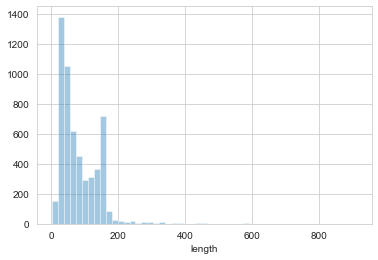

In [68]:
sns.set_style('whitegrid')
sns.distplot(pmessage['length'],bins=51,hist=True,kde=False)

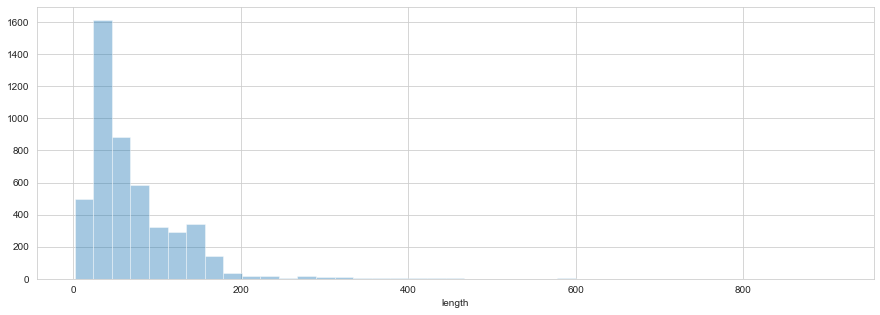

In [65]:
myfig,myaxes=plt.subplots(nrows=1,ncols=1,figsize=(15,5))
sns.distplot(pmessage[pmessage['label']=='ham']['length'],bins=41,hist=True,kde=False)

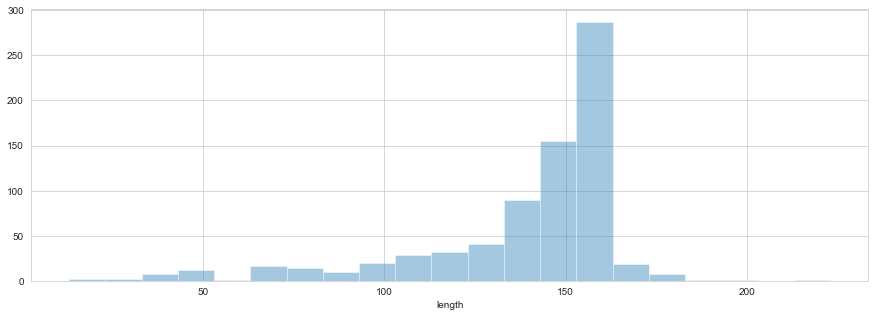

In [69]:
myfig,myaxes=plt.subplots(nrows=1,ncols=1,figsize=(15,5))
sns.distplot(pmessage[pmessage['label']=='spam']['length'],bins=21,hist=True,kde=False)

Through basic EDA we've been able to discover a trend that spam messages tend to have more characters.

Removing any punctuation and common words

In [70]:
import string
from nltk.corpus  import stopwords

In [71]:
def text_process(message):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    
    nopunc=[charac for charac in message if charac not in string.punctuation]
    
    nopuncstr=''.join(nopunc)
    nopunclist=nopuncstr.split()
    return [item for item in nopunclist if item not in stopwords.words('english')]

In [72]:
pmessage['text'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, I, dont, think, goes, usf, lives, around...
Name: text, dtype: object

Now we'll convert each message, represented as a list of tokens above, into a vector that machine learning models can understand.

We'll do that in three steps using the bag-of-words model:

1. Count how many times does a word occur in each message (Known as term frequency)

2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)



In [73]:
from sklearn.feature_extraction.text import CountVectorizer

In [74]:
transformer=CountVectorizer(analyzer=text_process).fit(pmessage['text'])

In [75]:
len(transformer.vocabulary_)

11617

taking  one example

In [81]:
msg41=pmessage['text'].iloc[41]
msg41vector=transformer.transform([msg41])

In [85]:
msg41vector.shape

(1, 11617)

In [87]:
print(msg41vector)

  (0, 1102)	1
  (0, 1365)	1
  (0, 1706)	1
  (0, 2362)	5
  (0, 2939)	1
  (0, 4639)	1
  (0, 5958)	1
  (0, 6853)	1
  (0, 8105)	1
  (0, 8578)	1
  (0, 10271)	1
  (0, 10453)	1
  (0, 10546)	1
  (0, 11137)	1


Result is  a sparse matrix since there are lot of 0's

In [88]:
msg41

'Did I forget to tell you ? I want you , I need you, I crave you ... But most of all ... I love you my sweet Arabian steed ... Mmmmmm ... Yummy'

In [89]:
transformer.get_feature_names()[2362]

'I'

Applying to the entire dataset

In [91]:
pmessage_vector=transformer.transform(pmessage['text'])

In [92]:
print('Shape of Sparse Matrix: ', pmessage_vector.shape)
print('Amount of Non-Zero occurences: ',pmessage_vector.nnz)

Shape of Sparse Matrix:  (5572, 11617)
Amount of Non-Zero occurences:  56024


Calculating Sparsity

In [94]:
sparsity = (100.0 * pmessage_vector.nnz / (pmessage_vector.shape[0] * pmessage_vector.shape[1]))
sparsity

0.08655038742205227

Calculating Term Frequency Inverse Document Frequency

In [96]:
from sklearn.feature_extraction.text import TfidfTransformer

In [98]:
tfidf_transformer=TfidfTransformer().fit(pmessage_vector)

In [99]:
tfidf_pmessage_vector=tfidf_transformer.transform(pmessage_vector)

In [100]:
tfidf_pmessage_vector.shape

(5572, 11617)

We can get the Inverse Documnet Frequency of the message words individually

In [108]:
print(tfidf_transformer.idf_[transformer.vocabulary_['I']])
print(tfidf_transformer.idf_[transformer.vocabulary_['university']])

2.5825288715811965
8.527076498901426


Buiding a spam detect model

We will use Naive Bias Classifier

In [123]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [116]:
msg_train, msg_test, label_train, label_test =train_test_split(pmessage['text'],pmessage['label'], test_size=0.33)

Using [pipeline](http://scikit-learn.org/stable/modules/pipeline.html) capabilities to store a pipeline of workflow.

In [118]:
from sklearn.pipeline import Pipeline

In [119]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [120]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000024EDE98DCA8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [121]:
predictions=pipeline.predict(msg_test)

Evaluating Model

In [124]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1598
        spam       1.00      0.75      0.86       241

    accuracy                           0.97      1839
   macro avg       0.98      0.88      0.92      1839
weighted avg       0.97      0.97      0.97      1839



In [125]:
print(confusion_matrix(label_test,predictions))

[[1598    0]
 [  60  181]]
